* 매개변수의 최적값을 탐색하는 최적화 방법
* 가중치 매개변수 초깃값
* 하이퍼파라미터 설정 방법

* 신경망 학습의 목적 -> 손실함수의 값을 가능한 낮추는 매개변수를 찾는것 
* 목적을 해결하는 방법 중 하나로 SGD(확률적 경사 하강법)이 있다.

In [2]:
import pandas as pd
import numpy as np

In [7]:
# SGD(확률적 경사하강법) 클래스로 구현해보기
# params는 가중치 매개변수 저장, grads는 기울기를 저장하고 있다.

class SGD:
    def __init__(self,lr=0.01): # 학습률 지정
        self.lr = lr
        
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr* grads[key]  # 경사하강법 -> 업데이트 

* SGD의 단점
* 비등방성 함수에서는 탐색 경로가 비효율적이다.
* 비등방성 -> 기울기가 가르키는 방향이 한군데가 아니라 여러군데이다.
* 이 단점을 해결하기 위해 모멘텀, AdaGrad, Adam이 있다.

# 모멘텀

* 물리의 개념(가속도)이 들어간다. -> 매개변수를 갱신할때 기울기 방향으로 가속됨의 개념을 이용한다.

In [23]:
# 모멘텀 클래스로 구현해보기

class Momentum:
    
    # 초기치 정의
    def __init__(self,lr = 0.01,momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    # 매개변수 업데이트
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

###########################
# 공이 그릇 바닥을 구르듯 움직인다 

# AdaGrad

* 학습률이 너무 작으면 학습시간이 오래걸리고 너무 크면 최저점을 찾지못하고 넘어가 학습이 제대로 이루어지지 않을 수 있다.
* 이를 해결하기 위해 학습률 감소 기술을 사용한다.
* AdaGrad는 각각의 매개변수에 맞춤형 갱신을 해준다.
* 만약 매개변수중에서 크게 갱신된 매개변수는 학습률이 낮아진다.

* AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다. -> 업데이트 할때 제곱한 값이 분모로 가므로 결국 갱신정도가 약해지게 된다.

In [24]:
# AdaGrad 클래스 구현하기

class AdaGrad:
     
    # 초기치 정하기
    def __init__(self,lr=0.01):
        self.lr = lr
        self.h = None
        
    # 매개변수 업데이트
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])+ 1e-7)  # 0일때 계산이 안되는 문제를 해결하기 위해 1e-7를 더함

##########################
# 변동 폭이 크면 갱신 폭이 크게 감소한다.

# Adam

* momentum 과 AdaGrad를 융합시킨 방법이다.
* 파라미터가 3개이다. -> 학습률, 일차 모멘텀용 계수, 이차 모멘텀용 계수

In [25]:
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

x
-7.0
0.0


y
2.0
0.0




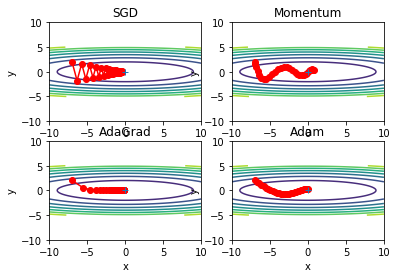

In [30]:
# 위에서 만든 클래스를 이용해 결과 확인해보기!!
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict # 순서를 정해준다,

# 함수정의하기  -> x^2/20  + y^2 함수
def f(x,y):
    return x**2 / 20.0 + y**2

# 미분한 함수 --> x에 대해서 미분한 함수, y에 대해 미분한 함수
def df(x,y):
    return x / 10.0 , 2.0*y

# 초기치 지정
init_pos = (-7.0,2.0)
params = {}
params['x'],params['y'] = init_pos[0] , init_pos[1]
grads = {}
grads['x'], grads['y'] =  0, 0

# 클래스 객체들 생성
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1) 
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

#####################################
for key, val in params.items():
    print(key)
    print(val)
    print(np.zeros_like(val))
    print('\n')
#####################################

idx = 1 # 서브플롯 위치지정

# 기울기를 갱신할때 각각의 포인트 저장하기
for key in optimizers:
    optimizer = optimizers[key]
    x_history = [] # 업데이트 될때마다의 x값 저장
    y_history = [] # 업데이트 될때마다의 y값 저장
    
    # 초기 매개변수 설정
    params['x'] , params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):  # 업데이트 30번 반복
        x_history.append(params['x'])  # 갱신될때마다 x__history에 저장
        y_history.append(params['y'])
        
        # 기울기 설정
        grads['x'],grads['y'] = df(params['x'],params['y'])
        optimizer.update(params,grads) # optimizer에 저장되어 있는 클래스 순서대로 실행 + 클래스에 저장되어 있는 update 함수 사용
        
        
    # 그래프 그리기
    x = np.arange(-10,10,0.01)
    y = np.arange(-5,5,0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    #plt.figure(figsize=(5,5))
    plt.subplot(2, 2, idx)  # 서브플롯 그리기
    idx += 1  # 서브플롯 위치 지정
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+') # (0,0)위치에 + 로 표시
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

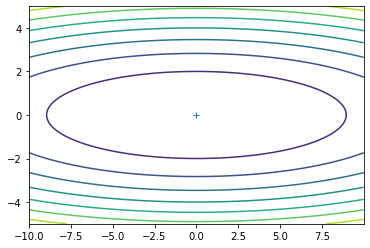

In [20]:
# x = np.arange(-10, 10, 0.01)
# y = np.arange(-5, 5, 0.01)
# X, Y = np.meshgrid(x, y) 
# Z = f(X, Y)
# plt.contour(X, Y, Z)
# plt.plot(0, 0, '+')

# 가중치의 초기값

* 신경망 학습에서 특히 중요한 것이 가중치의 초기값이다. 
* 가중치의 초기값에 따라 결과가 많이 달라진다.
* 가중치의 초기값에 따른 활성값들의 분포를 확인한다.

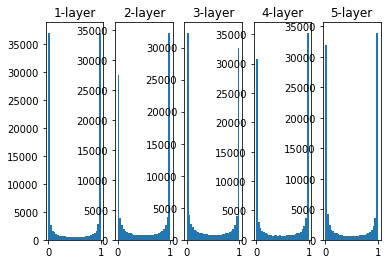

In [48]:
# 가중치의 초기값을 변화시키면서 활성화값들의 분포가 어떻게 변하는지 확인

# 시그모이드 함수 (활성화 함수)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 무작위 입력 데이터 생성
x = np.random.randn(1000,100)
node_num = 100 # 각 은닉층의 노드수 지정
hidden_layer_size = 5 # 은닉층 개수 지정
activations = {}  # 활성화 함수 결과 저장

for i in range(hidden_layer_size):
    if i != 0:  # 첫번째는 활성화함수를 쓰지 않는다.
        x = activations[i-1]  # 활성화함수 값을 x로 저장
        
    # 가중치 초기치 지정
    w = np.random.randn(node_num,node_num) * 1  # 표준편차가 1인 정규분포 사용
    
    a = np.dot(x,w) # x와 w를 곱한다.
    z = sigmoid(a) # 곱한값을 활성화 함수에 넣어 활성화값을 구한다.
    activations[i] = z # 활성화값을 activations 딕셔너리에 저장한다.
    

# # 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1,len(activations),i+1) # 1행 len(activations)열에서 i+1번째 플롯 그리기
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

############################
# 0 과 1 에 치우쳐져 있으면 gradient vashing 문제가 발생하게 된다. (기울기 소실)

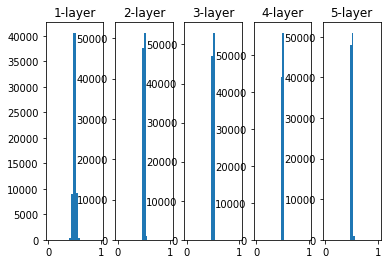

In [47]:
# 무작위 입력 데이터 생성
x = np.random.randn(1000,100)
node_num = 100 # 각 은닉층의 노드수 지정
hidden_layer_size = 5 # 은닉층 개수 지정
activations = {}  # 활성화 함수 결과 저장

for i in range(hidden_layer_size):
    if i != 0:  # 첫번째는 활성화함수를 쓰지 않는다.
        x = activations[i-1]  # 활성화함수 값을 x로 저장
        
    # 가중치 초기치 지정
    w = np.random.randn(node_num,node_num) * 0.01  # 표준편차가 0.01인 정규분포 사용
    
    a = np.dot(x,w) # x와 w를 곱한다.
    z = sigmoid(a) # 곱한값을 활성화 함수에 넣어 활성화값을 구한다.
    activations[i] = z # 활성화값을 activations 딕셔너리에 저장한다.
    

# # 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1,len(activations),i+1) # 1행 len(activations)열에서 i+1번째 플롯 그리기
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

#########################
# 가운데로 몰려있으면 기울기 소실은 일어나지 않지만 모든 층이 같은 값을 출력하므로 여러 층을 나눈 이유가 사라지게 된다.

# 즉, 각 층의 활성화값은 적당히 고루 분포되어야 한다.

# Xavier 초기값

* 초기 가중치 설정 -> Xavier 초기값
* Xavier 초기값 => 앞 계층의 노드가 n개라면 표준편차가 1/sqrt(n)인 분포를 사용하면 된다.

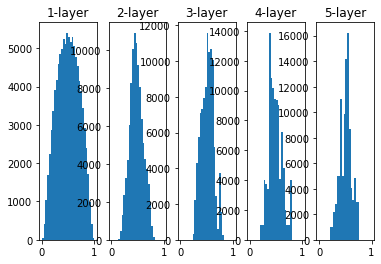

In [49]:
# 무작위 입력 데이터 생성
x = np.random.randn(1000,100)
node_num = 100 # 각 은닉층의 노드수 지정
hidden_layer_size = 5 # 은닉층 개수 지정
activations = {}  # 활성화 함수 결과 저장

for i in range(hidden_layer_size):
    if i != 0:  # 첫번째는 활성화함수를 쓰지 않는다.
        x = activations[i-1]  # 활성화함수 값을 x로 저장
        
    # 가중치 초기치 지정
    w = np.random.randn(node_num,node_num) /np.sqrt(node_num)  # Xavier 초기값 사용하기
    
    a = np.dot(x,w) # x와 w를 곱한다.
    z = sigmoid(a) # 곱한값을 활성화 함수에 넣어 활성화값을 구한다.
    activations[i] = z # 활성화값을 activations 딕셔너리에 저장한다.
    

# # 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1,len(activations),i+1) # 1행 len(activations)열에서 i+1번째 플롯 그리기
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

##############################
# 고르게 분포한다는 것을 확인할 수 있다.
# Xavier 초기값은 활성화 함수가 선형인 것을 전제로 한다. (sigmoid , tanh)

# He 초기값

* 활성화 함수로 ReLU를 사용할 때 He 초기값을 사용한다.
* 앞 계층의 노드가 n개일 때 표준편차가 sqrt(2/n)인 정규분포를 사용한다. --> relu는 음의 영역이 0이므로 2배더 늘린다고 생각

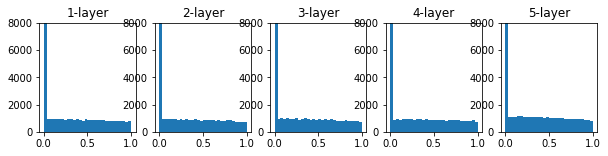

In [57]:
# relu 함수 만들기
def relu(x):
    return np.maximum(0,x)

# 무작위 입력 데이터 생성
x = np.random.randn(1000,100)
node_num = 100 # 각 은닉층의 노드수 지정
hidden_layer_size = 5 # 은닉층 개수 지정
activations = {}  # 활성화 함수 결과 저장

for i in range(hidden_layer_size):
    if i != 0:  # 첫번째는 활성화함수를 쓰지 않는다.
        x = activations[i-1]  # 활성화함수 값을 x로 저장
        
    # 가중치 초기치 지정
    w = np.random.randn(node_num,node_num) * np.sqrt(2/node_num)  # He 초기값 사용
    
    a = np.dot(x,w) # x와 w를 곱한다.
    z = relu(a) # 곱한값을 활성화 함수에 넣어 활성화값을 구한다.
    activations[i] = z # 활성화값을 activations 딕셔너리에 저장한다.
    

# 히스토그램 그리기
plt.figure(figsize=(10,2))
for i, a in activations.items():
    
    plt.subplot(1,len(activations),i+1) # 1행 len(activations)열에서 i+1번째 플롯 그리기
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30,range=(0,1))
    plt.ylim(0,8000)
plt.show()

# 배치 정규화

* 가중치의 초기값을 적절하게 설정하면 각 층의 활성화값 분포가 고르게 퍼지는 것을 확인했다.
* 각 층의 활성화값의 분포를 적당히 퍼지도록 '강제'하는 아이디어는 배치 정규화 이다.

* 배치 정규화의 장점
* 학습 속도 개선
* 초기값에 크게 의존하지 않는다.
* 오버피팅을 억제한다.

* 알고리즘
* 1. 미니배치한 입력데이터의 평균과 분산을 구한다.
* 2. 입력 데이터를 평균이 0, 분산이 1이 되게 정규화시킨다.
* 3. 이 처리를 활성화 함수의 앞 또는 뒤에 삽입한다.
* 4. 배치 정규화 계층마다 정규화된 데이터에 고유한 확대와 이동 변환을 수행한다.

In [60]:
import sys, os
os.chdir('C:/Users/174518/Desktop/c언어,파이선/파이썬 데이터/밑바닥부터시작하는딥러닝1/deep-learning-from-scratch-master')
sys.path.append(os.pardir) # 부모 디렉토리를 가져올 수 있게 설정

============== 1/16 ==============
epoch:0 | 0.105 - 0.059


C:\Users\174518\Desktop\c언어,파이선\파이썬 데이터\밑바닥부터시작하는딥러닝1\deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\174518\Desktop\c언어,파이선\파이썬 데이터\밑바닥부터시작하는딥러닝1\deep-learning-from-scratch-master\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\174518\Desktop\c언어,파이선\파이썬 데이터\밑바닥부터시작하는딥러닝1\deep-learning-from-scratch-master\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.058
epoch:2 | 0.097 - 0.094
epoch:3 | 0.097 - 0.121
epoch:4 | 0.097 - 0.148
epoch:5 | 0.097 - 0.16
epoch:6 | 0.097 - 0.18
epoch:7 | 0.097 - 0.212
epoch:8 | 0.097 - 0.233
epoch:9 | 0.097 - 0.259
epoch:10 | 0.097 - 0.286
epoch:11 | 0.097 - 0.3
epoch:12 | 0.097 - 0.328
epoch:13 | 0.097 - 0.327
epoch:14 | 0.097 - 0.344
epoch:15 | 0.097 - 0.354
epoch:16 | 0.097 - 0.377
epoch:17 | 0.097 - 0.38
epoch:18 | 0.097 - 0.39


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.408
============== 2/16 ==============
epoch:0 | 0.094 - 0.095
epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.144
epoch:3 | 0.097 - 0.16
epoch:4 | 0.097 - 0.181
epoch:5 | 0.097 - 0.216
epoch:6 | 0.097 - 0.248
epoch:7 | 0.097 - 0.27
epoch:8 | 0.097 - 0.298
epoch:9 | 0.097 - 0.316
epoch:10 | 0.097 - 0.342
epoch:11 | 0.097 - 0.369
epoch:12 | 0.097 - 0.391
epoch:13 | 0.097 - 0.412
epoch:14 | 0.097 - 0.426
epoch:15 | 0.097 - 0.449
epoch:16 | 0.097 - 0.475
epoch:17 | 0.097 - 0.491
epoch:18 | 0.097 - 0.499


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.511
============== 3/16 ==============
epoch:0 | 0.164 - 0.114
epoch:1 | 0.405 - 0.12
epoch:2 | 0.567 - 0.144
epoch:3 | 0.649 - 0.164
epoch:4 | 0.689 - 0.201
epoch:5 | 0.751 - 0.243
epoch:6 | 0.806 - 0.277
epoch:7 | 0.846 - 0.316
epoch:8 | 0.892 - 0.345
epoch:9 | 0.899 - 0.382
epoch:10 | 0.926 - 0.413
epoch:11 | 0.937 - 0.444
epoch:12 | 0.946 - 0.478
epoch:13 | 0.961 - 0.504
epoch:14 | 0.967 - 0.534
epoch:15 | 0.974 - 0.561
epoch:16 | 0.981 - 0.593
epoch:17 | 0.984 - 0.599
epoch:18 | 0.987 - 0.617
epoch:19 | 0.987 - 0.642

No handles with labels found to put in legend.



============== 4/16 ==============
epoch:0 | 0.114 - 0.112
epoch:1 | 0.337 - 0.093
epoch:2 | 0.449 - 0.159
epoch:3 | 0.545 - 0.279
epoch:4 | 0.608 - 0.365
epoch:5 | 0.636 - 0.433
epoch:6 | 0.688 - 0.481
epoch:7 | 0.712 - 0.515
epoch:8 | 0.745 - 0.557
epoch:9 | 0.776 - 0.607
epoch:10 | 0.781 - 0.633
epoch:11 | 0.79 - 0.66
epoch:12 | 0.811 - 0.688
epoch:13 | 0.828 - 0.704
epoch:14 | 0.823 - 0.729
epoch:15 | 0.841 - 0.744
epoch:16 | 0.845 - 0.756
epoch:17 | 0.856 - 0.768
epoch:18 | 0.861 - 0.778


No handles with labels found to put in legend.


epoch:19 | 0.866 - 0.789
============== 5/16 ==============
epoch:0 | 0.134 - 0.125
epoch:1 | 0.14 - 0.145
epoch:2 | 0.146 - 0.269
epoch:3 | 0.153 - 0.407
epoch:4 | 0.165 - 0.494
epoch:5 | 0.18 - 0.572
epoch:6 | 0.191 - 0.624
epoch:7 | 0.192 - 0.676
epoch:8 | 0.203 - 0.715
epoch:9 | 0.218 - 0.749
epoch:10 | 0.237 - 0.776
epoch:11 | 0.255 - 0.797
epoch:12 | 0.272 - 0.812
epoch:13 | 0.284 - 0.83
epoch:14 | 0.301 - 0.843
epoch:15 | 0.319 - 0.846
epoch:16 | 0.332 - 0.857
epoch:17 | 0.336 - 0.869
epoch:18 | 0.355 - 0.877


No handles with labels found to put in legend.


epoch:19 | 0.361 - 0.89
============== 6/16 ==============
epoch:0 | 0.123 - 0.077
epoch:1 | 0.142 - 0.166
epoch:2 | 0.118 - 0.355
epoch:3 | 0.146 - 0.521
epoch:4 | 0.157 - 0.63
epoch:5 | 0.117 - 0.688
epoch:6 | 0.117 - 0.738
epoch:7 | 0.117 - 0.777
epoch:8 | 0.117 - 0.814
epoch:9 | 0.117 - 0.836
epoch:10 | 0.117 - 0.868
epoch:11 | 0.117 - 0.879
epoch:12 | 0.117 - 0.892
epoch:13 | 0.117 - 0.905
epoch:14 | 0.117 - 0.914
epoch:15 | 0.117 - 0.928
epoch:16 | 0.117 - 0.94
epoch:17 | 0.117 - 0.94
epoch:18 | 0.117 - 0.951


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.961
============== 7/16 ==============
epoch:0 | 0.117 - 0.117
epoch:1 | 0.117 - 0.258
epoch:2 | 0.1 - 0.498
epoch:3 | 0.1 - 0.619
epoch:4 | 0.1 - 0.678
epoch:5 | 0.117 - 0.722
epoch:6 | 0.117 - 0.764
epoch:7 | 0.117 - 0.809
epoch:8 | 0.117 - 0.837
epoch:9 | 0.117 - 0.881
epoch:10 | 0.117 - 0.907
epoch:11 | 0.117 - 0.925
epoch:12 | 0.117 - 0.942
epoch:13 | 0.117 - 0.962
epoch:14 | 0.117 - 0.968
epoch:15 | 0.117 - 0.98
epoch:16 | 0.117 - 0.984
epoch:17 | 0.117 - 0.99
epoch:18 | 0.117 - 0.992


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.991
============== 8/16 ==============
epoch:0 | 0.097 - 0.14
epoch:1 | 0.116 - 0.441
epoch:2 | 0.116 - 0.649
epoch:3 | 0.116 - 0.756
epoch:4 | 0.117 - 0.796
epoch:5 | 0.116 - 0.848
epoch:6 | 0.116 - 0.882
epoch:7 | 0.116 - 0.932
epoch:8 | 0.116 - 0.946
epoch:9 | 0.116 - 0.971
epoch:10 | 0.116 - 0.982
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.989
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.996
epoch:17 | 0.116 - 0.997
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.105 - 0.14
epoch:1 | 0.116 - 0.503
epoch:2 | 0.117 - 0.735
epoch:3 | 0.117 - 0.787
epoch:4 | 0.117 - 0.851
epoch:5 | 0.117 - 0.941
epoch:6 | 0.117 - 0.969
epoch:7 | 0.117 - 0.978
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.094 - 0.136
epoch:1 | 0.117 - 0.718
epoch:2 | 0.117 - 0.892
epoch:3 | 0.117 - 0.912
epoch:4 | 0.117 - 0.946
epoch:5 | 0.117 - 0.932
epoch:6 | 0.117 - 0.954
epoch:7 | 0.117 - 0.963
epoch:8 | 0.117 - 0.991
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.989
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.997
epoch:13 | 0.116 - 0.998
epoch:14 | 0.117 - 0.987
epoch:15 | 0.117 - 0.994
epoch:16 | 0.116 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.094 - 0.143
epoch:1 | 0.117 - 0.579
epoch:2 | 0.117 - 0.737
epoch:3 | 0.117 - 0.643
epoch:4 | 0.117 - 0.842
epoch:5 | 0.117 - 0.815
epoch:6 | 0.117 - 0.857
epoch:7 | 0.117 - 0.845
epoch:8 | 0.116 - 0.884
epoch:9 | 0.116 - 0.889
epoch:10 | 0.116 - 0.889
epoch:11 | 0.116 - 0.895
epoch:12 | 0.117 - 0.882
epoch:13 | 0.117 - 0.887
epoch:14 | 0.117 - 0.898
epoch:15 | 0.117 - 0.899
epoch:16 | 0.117 - 0.899
epoch:17 | 0.117 - 0.893
epoch:18 | 0.117 - 0.897


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.901
============== 12/16 ==============
epoch:0 | 0.117 - 0.273
epoch:1 | 0.116 - 0.4
epoch:2 | 0.117 - 0.653
epoch:3 | 0.117 - 0.683
epoch:4 | 0.117 - 0.651
epoch:5 | 0.116 - 0.76
epoch:6 | 0.116 - 0.72
epoch:7 | 0.116 - 0.746
epoch:8 | 0.116 - 0.759
epoch:9 | 0.117 - 0.788
epoch:10 | 0.116 - 0.798
epoch:11 | 0.116 - 0.805
epoch:12 | 0.116 - 0.798
epoch:13 | 0.116 - 0.791
epoch:14 | 0.116 - 0.793
epoch:15 | 0.116 - 0.803
epoch:16 | 0.116 - 0.798
epoch:17 | 0.116 - 0.807
epoch:18 | 0.117 - 0.81


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.801
============== 13/16 ==============
epoch:0 | 0.099 - 0.149
epoch:1 | 0.116 - 0.443
epoch:2 | 0.116 - 0.658
epoch:3 | 0.116 - 0.671
epoch:4 | 0.116 - 0.685
epoch:5 | 0.116 - 0.731
epoch:6 | 0.116 - 0.767
epoch:7 | 0.116 - 0.788
epoch:8 | 0.116 - 0.771
epoch:9 | 0.116 - 0.785
epoch:10 | 0.116 - 0.796
epoch:11 | 0.116 - 0.794
epoch:12 | 0.116 - 0.796
epoch:13 | 0.116 - 0.797
epoch:14 | 0.116 - 0.798
epoch:15 | 0.116 - 0.853
epoch:16 | 0.116 - 0.888
epoch:17 | 0.116 - 0.869
epoch:18 | 0.116 - 0.882


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.89
============== 14/16 ==============
epoch:0 | 0.117 - 0.097
epoch:1 | 0.117 - 0.374
epoch:2 | 0.117 - 0.288
epoch:3 | 0.116 - 0.408
epoch:4 | 0.116 - 0.413
epoch:5 | 0.117 - 0.505
epoch:6 | 0.117 - 0.478
epoch:7 | 0.117 - 0.496
epoch:8 | 0.117 - 0.49
epoch:9 | 0.116 - 0.52
epoch:10 | 0.117 - 0.521
epoch:11 | 0.117 - 0.519
epoch:12 | 0.117 - 0.526
epoch:13 | 0.117 - 0.524
epoch:14 | 0.117 - 0.529
epoch:15 | 0.117 - 0.544
epoch:16 | 0.116 - 0.528
epoch:17 | 0.117 - 0.542
epoch:18 | 0.117 - 0.525


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.555
============== 15/16 ==============
epoch:0 | 0.093 - 0.108
epoch:1 | 0.117 - 0.323
epoch:2 | 0.117 - 0.39
epoch:3 | 0.117 - 0.4
epoch:4 | 0.117 - 0.415
epoch:5 | 0.116 - 0.417
epoch:6 | 0.116 - 0.421
epoch:7 | 0.116 - 0.423
epoch:8 | 0.117 - 0.428
epoch:9 | 0.117 - 0.431
epoch:10 | 0.116 - 0.416
epoch:11 | 0.116 - 0.428
epoch:12 | 0.116 - 0.432
epoch:13 | 0.116 - 0.436
epoch:14 | 0.116 - 0.43
epoch:15 | 0.116 - 0.435
epoch:16 | 0.116 - 0.437
epoch:17 | 0.116 - 0.433
epoch:18 | 0.116 - 0.434


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.43
============== 16/16 ==============
epoch:0 | 0.099 - 0.117
epoch:1 | 0.116 - 0.308
epoch:2 | 0.116 - 0.313
epoch:3 | 0.116 - 0.318
epoch:4 | 0.116 - 0.378
epoch:5 | 0.116 - 0.407
epoch:6 | 0.116 - 0.408
epoch:7 | 0.116 - 0.417
epoch:8 | 0.116 - 0.415
epoch:9 | 0.116 - 0.421
epoch:10 | 0.117 - 0.423
epoch:11 | 0.117 - 0.426
epoch:12 | 0.116 - 0.299
epoch:13 | 0.116 - 0.396
epoch:14 | 0.116 - 0.424
epoch:15 | 0.116 - 0.428
epoch:16 | 0.116 - 0.43
epoch:17 | 0.117 - 0.425
epoch:18 | 0.117 - 0.422
epoch:19 | 0.117 - 0.432


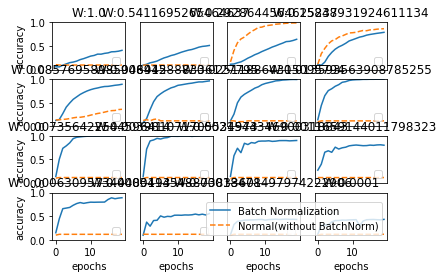

In [64]:
from ch06.batch_norm_test import *

# 오버피팅 문제 해결

* 오버피팅 문제 => 매개변수가 많고, 표현력이 높은 모델이거나 훈련데이터가 적은 경우에 발생한다.

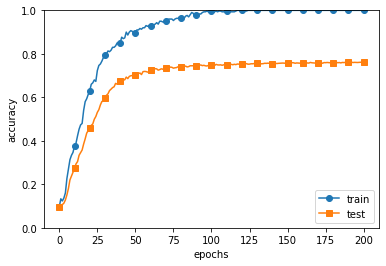

In [69]:
# 오버피팅을 일부러 일으켜보기
# mnist데이터 중 300개만 사용, 7층 네트워크 사용, 각 층의 뉴런은 100개, 활성화 함수는 ReLu를 사용

from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 데이터 나누기
(x_train, t_train) , (x_test,t_test) = load_mnist(normalize=True)

# 300개만 추출하기
x_train = x_train[:300]
t_train = t_train[:300]

# 신경망 적용하기
network = MultiLayerNet(input_size=784,hidden_size_list=[100,100,100,100,100,100],output_size=10) # 클래스 객체 생성
optimizer = SGD(lr = 0.01) # 학습률이 0.01인 경사하강법으로 매개변수 갱신

# 파라미터 설정
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 사이즈 정하기

# 손실값과 정확도를 저장할 리스트 만들기
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size,1) # 한번 에포크가 돌때 몇번 반복할 것인지 설정
epoch_cnt = 0

# 반복하기
for i in range(100000):
    batch_mask = np.random.choice(train_size,batch_size) # 전체 훈련 데이터 개수에서 배치 사이즈 개수만큼 랜덤 추출하기
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 구하고 업데이트 하기
    grads = network.gradient(x_batch,t_batch)
    optimizer.update(network.params, grads)
    
    # 1 에포크마다 결과 저장하기
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
# 그래프 그리기 -> 에포크별 정확도 변화 과정
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 오버피팅을 막는 방법
* 1. 가중치 감소 => l2,l1 규제등을 통해 가중치에 규제를 가해 오버피팅을 막을 수 있다.
* 2. 드롭아웃 => 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다. -> 삭제된 뉴런은 신호를 보내지 않고, 테스트 데이터를 넣을 때는 모든 뉴런에 신호를 전달한다.

In [70]:
# drop out 클래스 구현하기

class Dropout:
    def __init__(self,dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    # 순전파 함수
    def forward(self,x,train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0-self.dropout_ratio)
        
    def backward(self,dout):
        return dout * self.mask

# 적절한 하이퍼 파라미터 값 찾기

* 테스트 데이터는 마지막에 한번만 사용해야 한다.
* 훈련데이터 : 매개변수 학습
* 검증 데이터 : 파라미터 성능 평가
* 테스트 데이터 : 신경망의 일반화 성능 평가

* 하이퍼 파리미터 최적화
* 1. 하이퍼 파라미터 값의 범위 설정
* 2. 설정된 범위에서 하이퍼파라미터의 값을 무작위 추출
* 3. 위에서 추출한 하이퍼파라미터 값을 사용하여 학습시키고, 검증 데이터로 정확도 평가
* 4. 계속 반복하여 그 정확도의 결과를 보고 범위를 계속 좁혀나간다.

In [81]:
# 학습률과 가중치 감소의 세기를 조절하는 계수를 탐색
# 그리드 서치를 사용하는 것이아니라 랜덤으로 추출한 값을 사용한다.

weight_decay = 10**np.random.uniform(-8,-4)
lr = 10 ** np.random.uniform(-6,-2)

4.68396739044655e-06

val acc:0.12 | lr:3.0266237611691287e-05, weight decay:1.1160933268092991e-07
val acc:0.2 | lr:0.0004278002644088807, weight decay:8.219765331645417e-07
val acc:0.57 | lr:0.0035357589122405816, weight decay:3.1253830435838646e-05
val acc:0.12 | lr:0.00017011677364926612, weight decay:2.3491064664063257e-05
val acc:0.14 | lr:0.00035715719609553736, weight decay:4.2572026227310615e-06
val acc:0.07 | lr:1.431692405591208e-06, weight decay:3.7422130968298814e-07
val acc:0.09 | lr:1.3637105256150439e-06, weight decay:6.168267828239784e-06
val acc:0.11 | lr:0.00018416959065732256, weight decay:5.806918126802401e-05
val acc:0.39 | lr:0.0018287683610432983, weight decay:7.625459554000451e-06
val acc:0.14 | lr:0.00011794815604717093, weight decay:9.925802998756789e-08
val acc:0.09 | lr:3.5513630984727186e-05, weight decay:7.458881147156851e-07
val acc:0.13 | lr:0.0007260081560741506, weight decay:6.725456896378935e-07
val acc:0.68 | lr:0.00611684467534164, weight decay:3.6380729325354745e-07
va

Best-8(val acc:0.68) | lr:0.00611684467534164, weight decay:3.6380729325354745e-07
Best-9(val acc:0.68) | lr:0.004760746365748256, weight decay:1.2606465078702824e-06
Best-10(val acc:0.64) | lr:0.004135180237714296, weight decay:5.945790851484272e-06
Best-11(val acc:0.57) | lr:0.0035357589122405816, weight decay:3.1253830435838646e-05
Best-12(val acc:0.41) | lr:0.001526849059831611, weight decay:7.586329505464752e-07
Best-13(val acc:0.41) | lr:0.0024801598469847033, weight decay:2.159399333925256e-06
Best-14(val acc:0.39) | lr:0.0018287683610432983, weight decay:7.625459554000451e-06
Best-15(val acc:0.38) | lr:0.0028609117496324467, weight decay:3.247688149353294e-08
Best-16(val acc:0.37) | lr:0.0023173083128817007, weight decay:1.5292591523980853e-06
Best-17(val acc:0.33) | lr:0.0026343182377355965, weight decay:3.0430974540523e-08
Best-18(val acc:0.33) | lr:0.003253203166436146, weight decay:2.5254137953134395e-08
Best-19(val acc:0.32) | lr:0.0014755760559417438, weight decay:1.38420

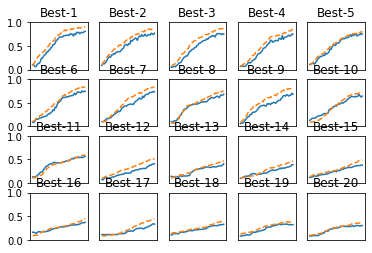

In [82]:
# 가중치 감소 계수를 10-8,10-4범위로 지정
# 학습률 범위를 10-6,10-2 범위로 지정
from ch06.hyperparameter_optimization import *